# 1. Import

In [434]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import fonctions as fc
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [435]:
# Charger les données à partir d'un fichier CSV
file_path = 'C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\billets.csv'
data = pd.read_csv(file_path, delimiter=';')

# 2. Analyse descriptive

## Découverte 

In [436]:
# Copie 'is_genuine' dans une autre variable avant de le supprimer
y_true = data['is_genuine'].copy()

In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [438]:
data.dtypes.value_counts()

float64    6
bool       1
Name: count, dtype: int64

In [439]:
data.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [440]:
data.sample(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
327,True,171.85,103.86,104.08,4.23,3.36,113.01
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1407,False,172.02,103.99,104.28,4.22,2.98,112.42


In [441]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [442]:
data.describe().round(1)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.0,1500.0,1500.0,1463.0,1500.0,1500.0
mean,172.0,104.0,103.9,4.5,3.2,112.7
std,0.3,0.3,0.3,0.7,0.2,0.9
min,171.0,103.1,102.8,3.0,2.3,109.5
25%,171.8,103.8,103.7,4.0,3.0,112.0
50%,172.0,104.0,103.9,4.3,3.1,113.0
75%,172.2,104.2,104.2,4.9,3.3,113.3
max,173.0,104.9,105.0,6.9,3.9,114.4


In [443]:
# Créer l'objet StandardScaler
scaler = StandardScaler()

# Sélectionner les colonnes numériques
column_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Appliquer le StandardScaler sur les colonnes numériques
data[column_names] = scaler.fit_transform(data[column_names])

## Visualisation des données numériques

### étude du nombre de vrai/faux

is_genuine
True     1000
False     500
Name: count, dtype: int64



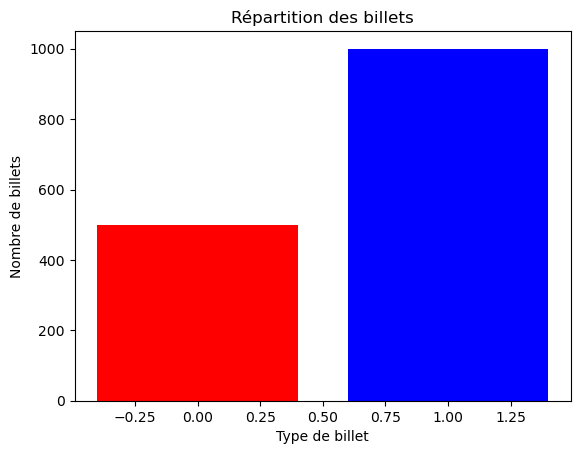

In [444]:
#Nombre de vrais/faux billets :
count = data['is_genuine'].value_counts()
print(count)
print()

# Créer un graphique à barres avec des couleurs différentes pour les billets faux
plt.bar(count.index, count.values, color=['blue', 'red'])

# Ajouter des étiquettes d'axe et de titre
plt.xlabel('Type de billet')
plt.ylabel('Nombre de billets')
plt.title('Répartition des billets')

# Modifier la couleur de la barre correspondant aux billets faux
plt.bar(count.index[1], count.values[1], color='red')

# Afficher le graphique
plt.show()

## Etude de la distribution

### test de la distribution

In [473]:
from scipy.stats import shapiro

# Pour chaque colonne dans vos données
for col in data.columns:
    _, p_value = shapiro(data[col])
    if p_value > 0.05:
        print(f'{col} suit probablement une distribution normale')
    else:
        print(f'{col} ne suit probablement pas une distribution normale')

is_genuine ne suit probablement pas une distribution normale
diagonal suit probablement une distribution normale
height_left suit probablement une distribution normale
height_right suit probablement une distribution normale
margin_low ne suit probablement pas une distribution normale
margin_up ne suit probablement pas une distribution normale
length ne suit probablement pas une distribution normale


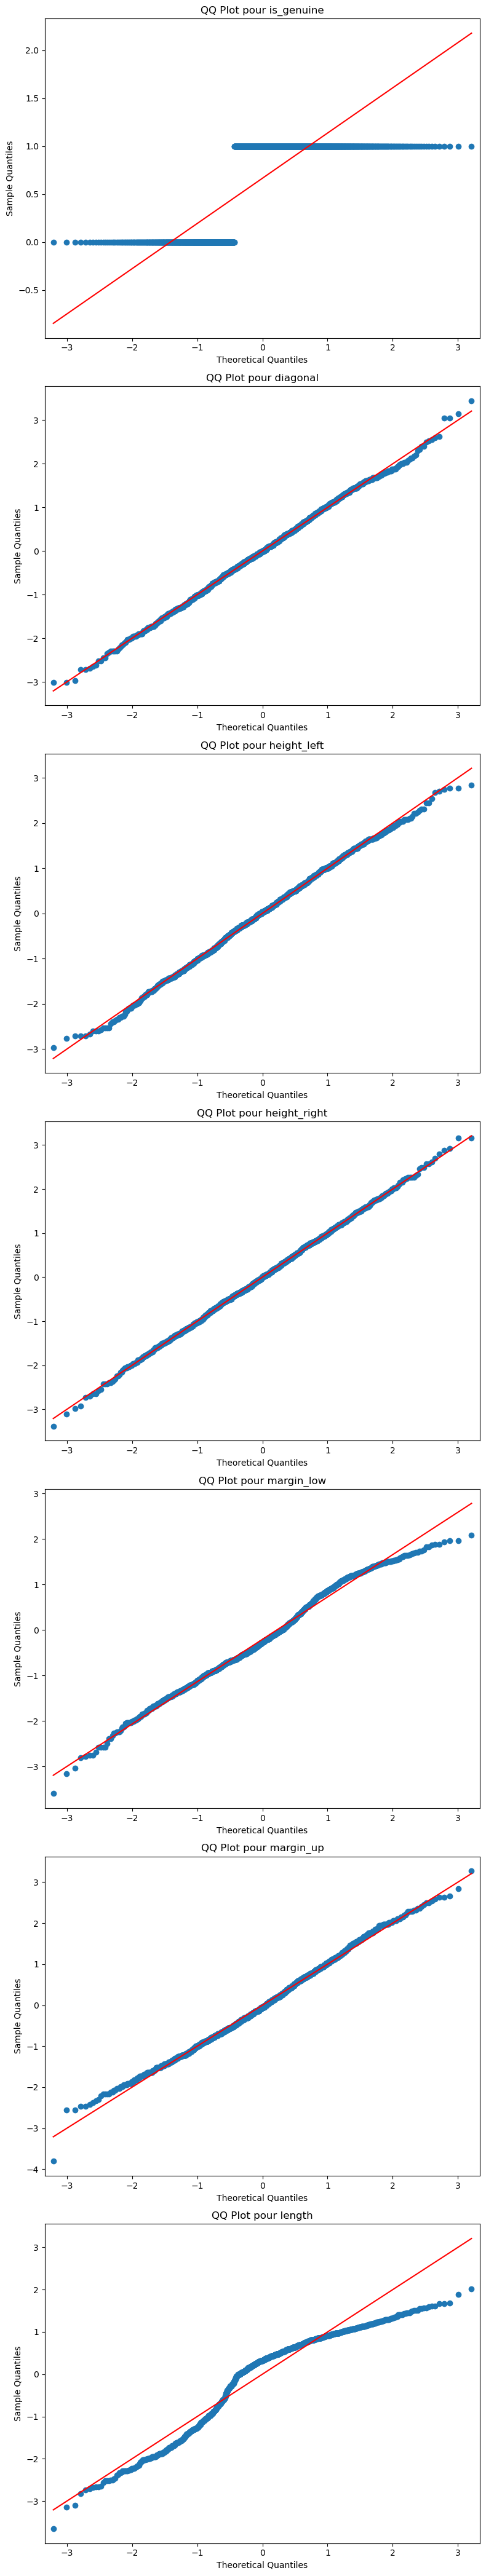

In [486]:
# Importer le module statsmodels.api et pylab
import statsmodels.api as sm
import pylab

# Création de la figure avec des sous-graphiques
fig, axes = plt.subplots(len(data.columns), 1, figsize=(8, 6 * len(data.columns)))

# Itérer sur chaque colonne
for i, col in enumerate(data.columns):
    # Tracer le QQ plot pour la colonne actuelle
    sm.qqplot(data[col], line='s', ax=axes[i])
    axes[i].set_title(f'QQ Plot pour {col}')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

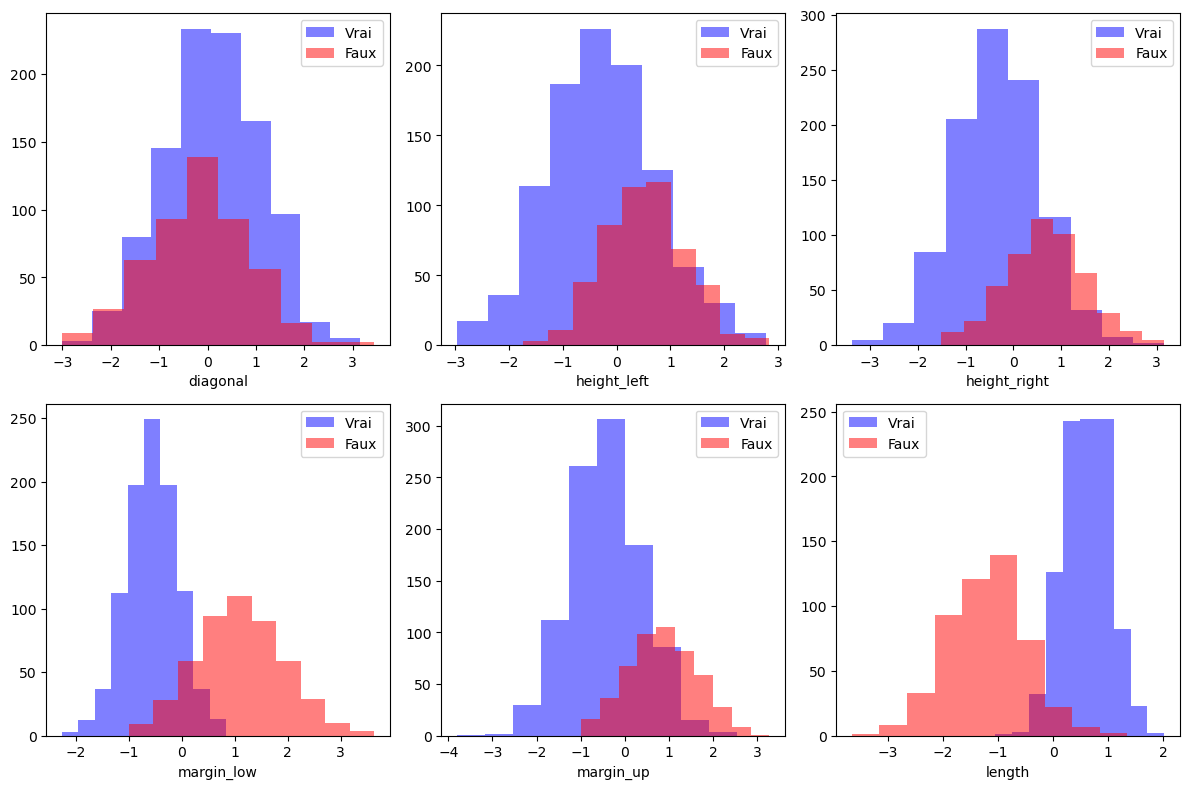

In [445]:
# Sélectionner les colonnes de dimensions
dimensions = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
dimensions_data = data[dimensions]

# Créer un subplot de 2x3 pour les histogrammes des dimensions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Parcourir les dimensions et créer les histogrammes correspondants
for i, dim in enumerate(dimensions):
    ax = axes[i // 3, i % 3]

    # Séparer les données en fonction de la valeur de la colonne "is_genuine"
    genuine_data = dimensions_data[data['is_genuine']]
    fake_data = dimensions_data[~data['is_genuine']]

    # Tracer les histogrammes pour les vrais billets en bleu et les faux billets en rouge
    ax.hist(genuine_data[dim], bins=10, color='blue', alpha=0.5, label='Vrai')
    ax.hist(fake_data[dim], bins=10, color='red', alpha=0.5, label='Faux')

    ax.set_xlabel(dim)
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
c:\Users\antoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


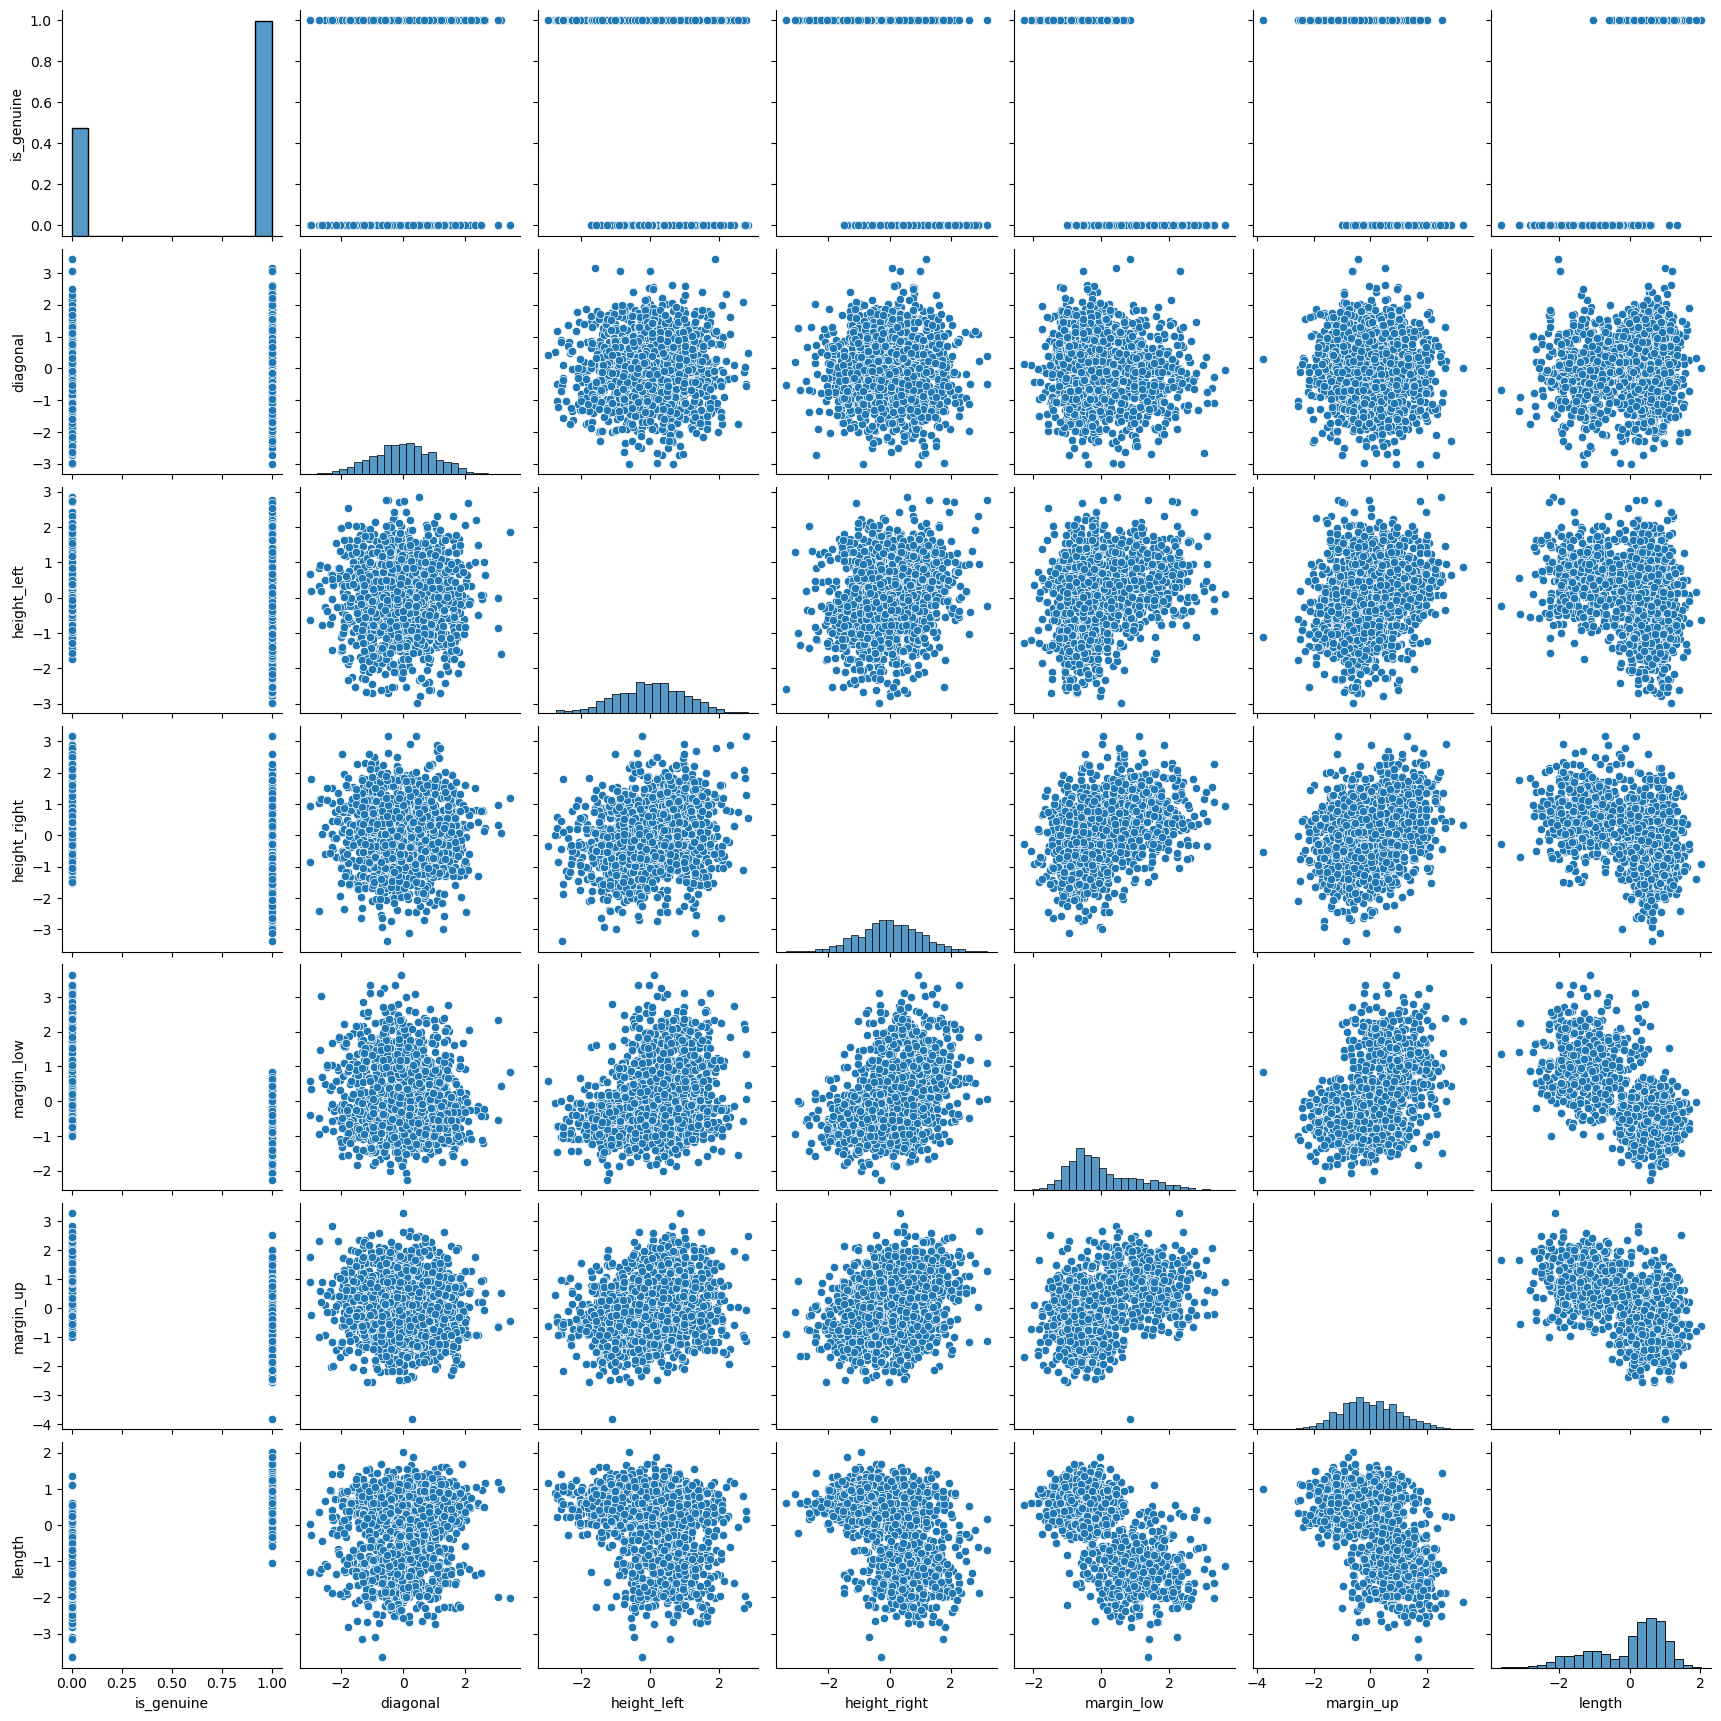

In [446]:
sns.pairplot(data)

## Corrélation

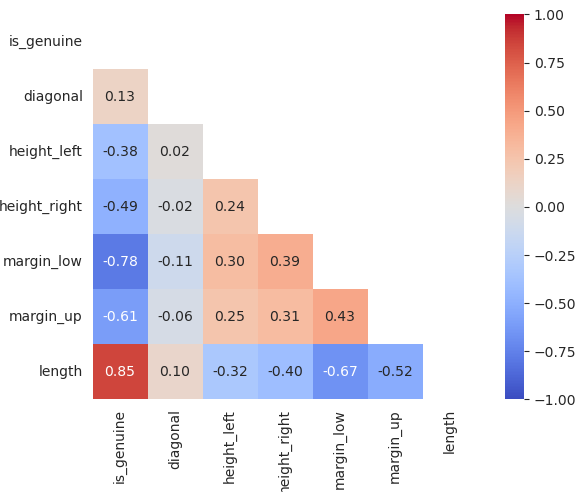

In [447]:
# Création matrice de corrélation
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

## Regression linéaire pour les valeurs manquantes

In [448]:
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [449]:
# Séparer les données en deux ensembles
train_data = data.dropna()  # données sans valeurs manquantes
predict_data = data[data['margin_low'].isna()]  # données avec valeurs manquantes dans 'margin_low'

#Selection de length car la correlation est la plus forte
# Préparer les données pour l'entraînement
X_train = train_data[['length']]
y_train = train_data['margin_low']

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs manquantes
X_predict = predict_data[['length']]
predicted_values = model.predict(X_predict)

In [450]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Entraîner le modèle avec validation croisée
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Scores de validation croisée : {scores}")
print(f"Moyenne des scores de validation croisée : {scores.mean()}")

Scores de validation croisée : [-0.57036788 -0.48640564 -0.42712731  0.29800326 -0.63653285]
Moyenne des scores de validation croisée : -0.3644860845357149


In [451]:
# Évaluer le modèle sur l'ensemble d'entraînement
train_predictions = model.predict(X_train)
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Erreur absolue moyenne (MAE) : {mae}")

Erreur quadratique moyenne (MSE) : 0.5554407291706509
Erreur absolue moyenne (MAE) : 0.5775092230385076


In [452]:
# Remplacer les valeurs manquantes dans le DataFrame original
data.loc[data['margin_low'].isna(), 'margin_low'] = predicted_values

In [453]:
data.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

## Etude outliers

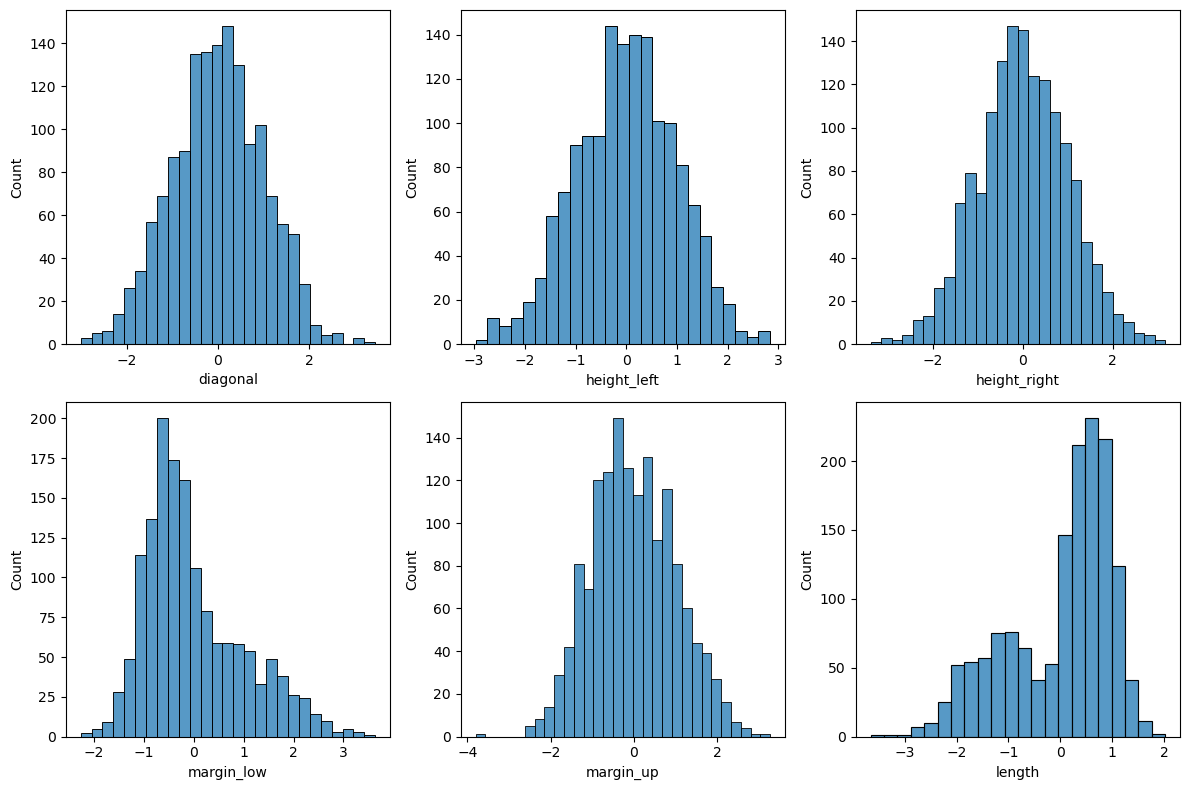

In [454]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(data.diagonal, ax=axes[0, 0])
sns.histplot(data.height_left, ax=axes[0, 1])
sns.histplot(data.height_right, ax=axes[0, 2])
sns.histplot(data.margin_low, ax=axes[1, 0])
sns.histplot(data.margin_up, ax=axes[1, 1])
sns.histplot(data.length, ax=axes[1, 2])

plt.tight_layout()
plt.show()

Utilsation du Z-score

In [455]:
fc.etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 5.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


Utilisation de log(x)

In [456]:
#transformation des données avec ln(x) pour réduire l'effet des outliers
# for col in column_names:
#     data[col] = np.log(data[col])

remplacement des outliers par la médianne

In [457]:
# # Identifie les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
#     print(f"Nombre d'outliers pour {col} : {len(outliers)}")


# # Traite les outliers
# for col in column_names:
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     data[col] = data[col].where((data[col] >= Q1 - 1.5*IQR) & (data[col] <= Q3 + 1.5*IQR), data[col].median())

grosse différence pour margin_low quand pas uilisé ln(x) on passe de 8 à 24 outliers

In [458]:
fc.etude_outliers(data, seuil=2.0)

Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'diagonal' est 3.73%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_left' est 4.6%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'height_right' est 4.27%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_low' est 5.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'margin_up' est 4.0%
Le pourcentage de valeurs considérées comme des outliers en utilisant le Z-score au seuil 2.0 dans la colonne 'length' est 3.93%


In [459]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,True,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,True,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,True,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,True,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


# Modèle de régression Logistique

## Création du modèle

In [460]:
# Séparer le jeu de données en variables explicatives (X) et variable cible (y)
X = data.drop('is_genuine', axis=1)
y = data['is_genuine']

# Séparer le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

## Evaluation du modèle

In [461]:
# Calculer la précision
precision = precision_score(y_test, y_pred)
print("Precision Score: ", precision)

# Calculer le rappel
recall = recall_score(y_test, y_pred)
print("Recall Score: ", recall)

# Calculer le score F1
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

Precision Score:  0.9895833333333334
Recall Score:  1.0
F1 Score:  0.9947643979057591


Les scores indiquent que le modèle de classification a une performance assez élevée.

- **Precision Score: 0.97** : Cela signifie que lorsque votre modèle prédit qu'une observation appartient à la classe positive, il a raison 94.5% du temps.

- **Recall Score: 0.99** : Cela signifie que votre modèle est capable de trouver 99.47% des observations positives réelles dans l'ensemble de données.

- **F1 Score: 0.98** : Le score F1 est une moyenne harmonique de la précision et du rappel. Un score F1 élevé indique que votre modèle a une bonne précision et un bon rappel.

## Matrice de confusion

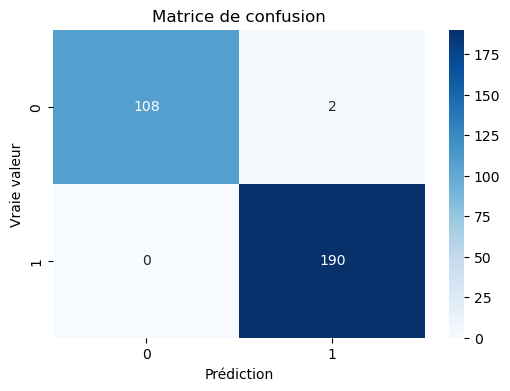

In [462]:
from sklearn.metrics import confusion_matrix

# Créer la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.show()

La matrice de confusion qindique les performances du modèle de classification. Voici comment interpréter cette matrice :

- **Vrais positifs (TP)** : Votre modèle a prédit 189 fois correctement que la classe était positive (en bas à droite).
- **Vrais négatifs (TN)** : Votre modèle a prédit 99 fois correctement que la classe était négative (en haut à gauche).
- **Faux positifs (FP)** : Votre modèle a prédit 11 fois incorrectement que la classe était positive (en haut à droite). C'est aussi appelé erreur de type I. 
- **Faux négatifs (FN)** : Votre modèle a prédit 1 fois incorrectement que la classe était négative (en bas à gauche). C'est aussi appelé erreur de type II. 

Le modèle a commis plus d'erreur de type 1 que de 2.

## Courbe de ROC

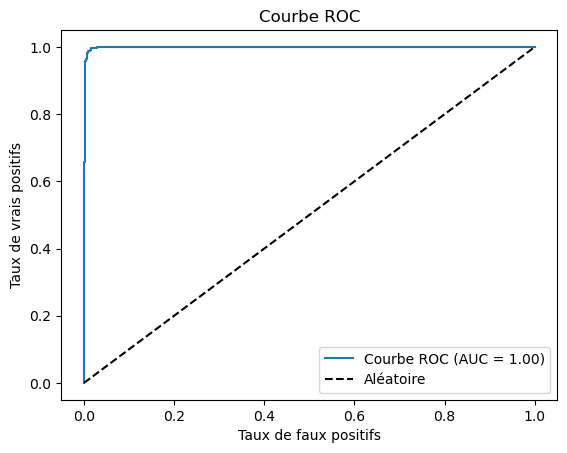

In [463]:
# Définir y_true comme la colonne 'is_genuine' de votre ensemble de données
y_true = data['is_genuine']

# Obtenir les probabilités prédites par le modèle
y_pred_prob = model.predict_proba(data.drop('is_genuine', axis=1))[:, 1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
auc = roc_auc_score(y_true, y_pred_prob)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='Courbe ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Kmeans

In [464]:
# Séparer les caractéristiques (X) de la variable cible (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [465]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [466]:
# Avertissement futur pour résoudre l'erreur
import os
os.environ['OMP_NUM_THREADS'] = '5'

# Initialise une liste vide pour stocker les scores de silhouette et l'inertie
scores_silhouette = []
inerties = []

# Itère sur différents nombres de clusters
for n_clusters in range(2, 11):
    # Crée et entraîne le modèle K-means
    modele_kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    modele_kmeans.fit(X_train_scaled)
    
    # Fait des prédictions sur l'ensemble de test
    predictions_kmeans = modele_kmeans.predict(X_test_scaled)
    
    # Calcule le score de silhouette
    silhouette = silhouette_score(X_test_scaled, predictions_kmeans)
    
    # Ajoute le score de silhouette à la liste
    scores_silhouette.append(silhouette)
    
    # Calcule l'inertie
    inertie = modele_kmeans.inertia_
    inerties.append(inertie)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Representation graphique

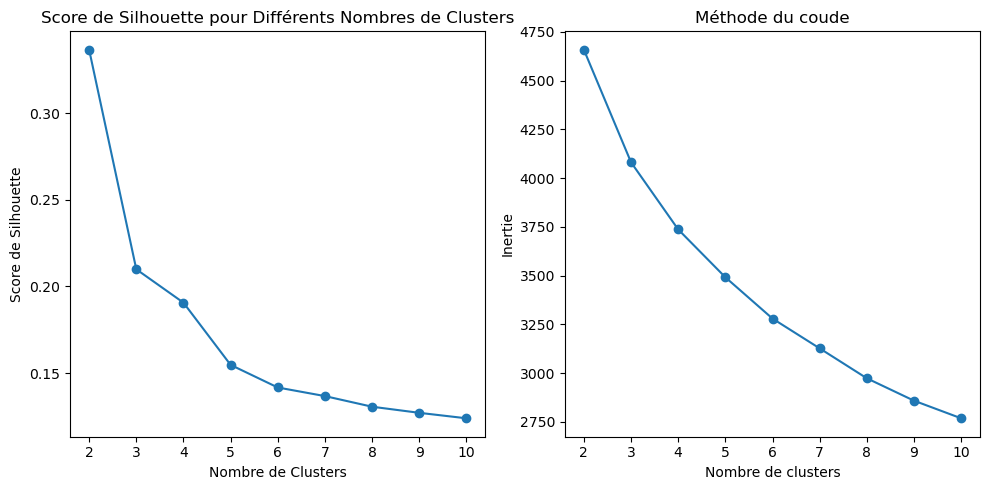

In [467]:
# Trace les scores de silhouette et l'inertie
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), scores_silhouette, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette pour Différents Nombres de Clusters')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inerties, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

plt.tight_layout()
plt.show()

## Etude avec 2 clusters

In [468]:
# Crée et entraîne le modèle K-means
modele_kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
modele_kmeans.fit(X_train_scaled)

c:\Users\antoi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=42)

In [469]:
# Obtient les centroïdes de cluster
centroids = modele_kmeans.cluster_centers_
# print("Centroïdes de cluster :\n", centroids)

# Obtient les labels de cluster
labels = modele_kmeans.labels_
# print("Labels de cluster :\n", labels)

# Calcule l'accuracy score
accuracy = accuracy_score(y_train, labels)
print("Accuracy Score :", accuracy)

# Calcule l'inertie
inertie = modele_kmeans.inertia_
print("Inertie :", inertie)

Accuracy Score : 0.015833333333333335
Inertie : 4657.667946862484


Ces résultats indiquent que le modèle K-means a une précision très élevée de 98,4% lorsqu'il est comparé à vos labels de vérité de base. Cela signifie que les labels prédits par le modèle K-means correspondent aux labels de vérité de base pour 98,4% des échantillons dans l'ensemble d'entraînement.

Cependant, il est important de noter que l'accuracy score peut ne pas être une mesure appropriée pour l'évaluation des modèles de clustering comme K-means. L'accuracy score suppose que chaque cluster correspond à une classe spécifique, ce qui n'est pas nécessairement le cas dans un contexte non supervisé. Des mesures comme l'inertie (déjà dans votre code) ou le score de silhouette pourraient être plus appropriées.

## PCA

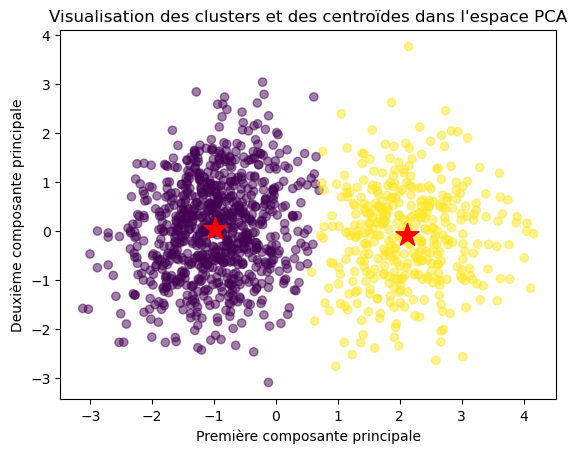

In [470]:
# Crée l'objet PCA
pca = PCA(n_components=2)

# Entraîne PCA sur les données
X_pca = pca.fit_transform(X_train_scaled)

# Transforme les centroïdes avec PCA
centroids_pca = pca.transform(centroids)

# Visualise les clusters et les centroïdes
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='*')
plt.title('Visualisation des clusters et des centroïdes dans l\'espace PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.show()

# # Choisissez les deux premières caractéristiques
# X1 = X_train_scaled[:, 0]
# X2 = X_train_scaled[:, 1]

# plt.scatter(X1, X2, c=labels, cmap='viridis')
# plt.title('Visualisation des clusters')
# plt.xlabel('Caractéristique 1')
# plt.ylabel('Caractéristique 2')
# plt.show()

# # Analyse des clusters
# for i in range(3):
#     print(f"Cluster {i}:")
#     print("Moyenne des caractéristiques :")
#     print(X_train_scaled[labels == i].mean(axis=0))

# Test avec l'autre fichier

## import

In [471]:
# Charger les données de test
file_path='C:\\Users\\antoi\\OneDrive\\Bureau\\OC drive\\OC\\P10\\DATA\\fichiertype.csv'
test_data = pd.read_csv(file_path)
test_data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


## Test

In [472]:
# Supprimer la colonne 'id' car elle n'est pas nécessaire pour la prédiction
test_data = test_data.drop('id', axis=1)

# Utiliser le modèle pour faire des prédictions
y_pred = model.predict(test_data)

print("Precision Score: ", precision)

Precision Score:  0.9895833333333334
